In [1]:
import numpy as np
import random
import math
import h5py
import gc
import sys
import pickle
import matplotlib.mlab as mlab
import pylab as pl
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
def acc(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 2).T == labels) / predictions.shape[1] / predictions.shape[0])

In [4]:
def randomize_dataset(images, labels):
    shuffle = list(zip(images, labels))
    np.random.shuffle(shuffle)
    i, l = zip(*shuffle)
    i, l = np.asarray(i), np.asarray(l)
    return i, l

In [5]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [6]:
hdf_file = 'datasets/pickles/MNIST_multi.hdf5'

hdf = h5py.File(hdf_file,'r')
train_dataset = hdf['train_images'][:]
train_labels = hdf['train_labels'][:]
test_dataset = hdf['test_images'][:]
test_labels = hdf['test_labels'][:]
            
hdf.close()    
    
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (98114, 32, 96, 1) (98114, 6)
Test set (14931, 32, 96, 1) (14931, 6)


In [7]:
def plot_img(im, label):
    if len(im.shape) >= 3:
        im = im[:,:,0]
    plt.imshow(im)
    plt.title(label)
    plt.show()
    
def plot(i):
    plot_img(train_dataset[i], train_labels[i])

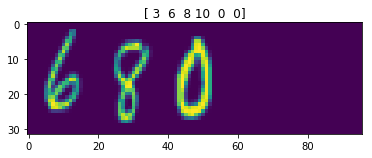

In [9]:
plot(130)

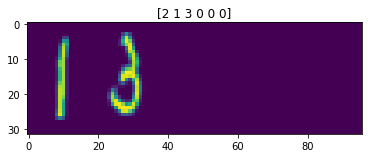

In [9]:
plot(65)

In [10]:
train_label_dict = {}
for i in range(train_labels.shape[0]):
    l = train_labels[i][0]
    if not l in train_label_dict:
        train_label_dict[l] = 0
    train_label_dict[l] = train_label_dict[l] + 1
    
test_label_dict = {}
for i in range(test_labels.shape[0]):
    l = test_labels[i][0]
    if not l in test_label_dict:
        test_label_dict[l] = 0
    test_label_dict[l] = test_label_dict[l] + 1

In [11]:
def hist_dict(dict) :
    dict = OrderedDict(sorted(dict.items()))
    X = np.arange(len(dict))
    pl.bar(X, dict.values(), align='center', width=0.5)
    pl.xticks(X, dict.keys())
    ymax = max(dict.values()) + 500
    pl.ylim(0, ymax)
    pl.show()

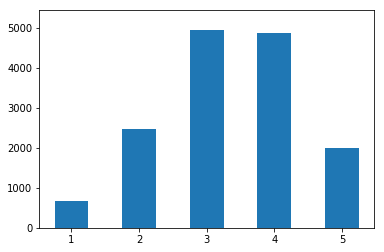

In [12]:
hist_dict(test_label_dict)

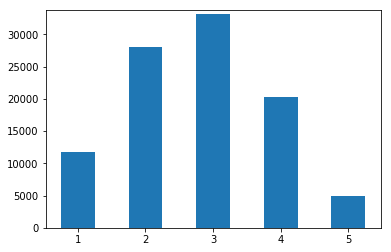

In [13]:
hist_dict(train_label_dict)

In [14]:
train_dataset = train_dataset.astype(np.float32)
test_dataset = test_dataset.astype(np.float32)

train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [15]:
train_dataset, train_labels = randomize_dataset(train_dataset, train_labels)
test_dataset, test_labels = randomize_dataset(test_dataset, test_labels)

In [16]:
model_to_save = "saved_models/mnist/CNN_SVHN_Mnist.ckpt"

In [38]:
graph_svhn = tf.Graph()

with graph_svhn.as_default():
    HEIGHT = 32
    WIDTH = 32*3

    X = tf.placeholder(tf.float32, [None, HEIGHT, WIDTH, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 6 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 12     # First Conv Layer with depth 12
    L = 24     # Second Conv Layer with depth 24
    M = 36    # Third Conv layer with depth 36
    N = 300   # Fourth Fully Connected layer with 300 neurons
    P = 200   # Fifth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1), name="W1")    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]), name="B1")
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1), name="W2")
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]), name="B2")
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1), name="W3")
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]), name="B3")
    
    W5_1 = tf.Variable(tf.truncated_normal([P, 11], stddev=0.1), name="W5_1")
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]), name="B5_1")
    
    W5_2 = tf.Variable(tf.truncated_normal([P, 11], stddev=0.1), name="W5_2")
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]), name="B5_2")
    
    W5_3 = tf.Variable(tf.truncated_normal([P, 11], stddev=0.1), name="W5_3")
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]), name="B5_3")
    
    W5_4 = tf.Variable(tf.truncated_normal([P, 11], stddev=0.1), name="W5_4")
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]), name="B5_4")
    
    W5_5 = tf.Variable(tf.truncated_normal([P, 11], stddev=0.1), name="W5_5")
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]), name="B5_5")
    
    # Model
    stride = 1  # output is 32x96
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 16x48
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 8x24
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1), name="W4")
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]), name="B4")
    
    W5 = tf.Variable(tf.truncated_normal([N, P], stddev=0.1), name="W5")
    B5 = tf.Variable(tf.constant(0.1, tf.float32, [P]), name="B5")

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    Y5 = tf.nn.relu(tf.matmul(Y4, W5) + B5)
    
    Y_F = tf.nn.dropout(Y5, pkeep)
    
    Ylogits_1 = tf.matmul(Y_F, W5_1) + B5_1
    Ylogits_2 = tf.matmul(Y_F, W5_2) + B5_2
    Ylogits_3 = tf.matmul(Y_F, W5_3) + B5_3
    Ylogits_4 = tf.matmul(Y_F, W5_4) + B5_4
    Ylogits_5 = tf.matmul(Y_F, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
   
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    W_s = tf.pack([tf.reduce_max(tf.abs(W1)),tf.reduce_max(tf.abs(W2)),tf.reduce_max(tf.abs(W3))\
                   ,tf.reduce_max(tf.abs(W4)),tf.reduce_max(tf.abs(W5))])
    b_s = tf.pack([tf.reduce_max(tf.abs(B1)),tf.reduce_max(tf.abs(B2)),tf.reduce_max(tf.abs(B3))\
                   ,tf.reduce_max(tf.abs(B4)),tf.reduce_max(tf.abs(B5))])
    
    model_saver = tf.train.Saver()

In [42]:
train_data = train_dataset
label_data = train_labels
print('train : ', train_data.shape, '  test : ', label_data.shape)

mnist_train_dict = {}
num_steps = int(label_data.shape[0] / batch_size)
num_epochs = 25
batch_size = 128

with tf.Session(graph=graph_svhn) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
      
    for epoch in range(num_epochs):
        res_epoch = {}
        for step in range(num_steps - 1):
            max_learning_rate = 0.0005
            min_learning_rate = 0.0001

            decay_speed = 5000.0
            learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-step/decay_speed)

            batch_data = train_data[step*batch_size:(step + 1)*batch_size, :, :, :]
            batch_labels = label_data[step*batch_size:(step + 1)*batch_size, :]

            feed_dict = {X : batch_data, Y_ : batch_labels, pkeep : 0.80, alpha : learning_rate}
            _, l, train_pred, W, b = session.run([train_step, cross_entropy, train_prediction, W_s, b_s], feed_dict=feed_dict)
            accuracy = float(acc(train_pred, batch_labels[:,1:6]))

            if (step % 150 == 0):
                minibatch = {}
                minibatch['loss'] = l
                minibatch['W'] = W
                minibatch['B'] = b
                minibatch['accuracy'] = "%.2f" % accuracy

                res_epoch[int(step/150)] = minibatch
                print('Loss at step %d: %f' % (step, l))
                print('Minibatch accuracy: %.1f%%' % acc(train_pred, batch_labels[:,1:6]))
                print('    ')
                
        mnist_train_dict[epoch+1] = res_epoch

        epoch_acc = 0
        for f in res_epoch:
            minibatch = res_epoch[f]
            epoch_acc += float(minibatch['accuracy'])
        epoch_acc = float(epoch_acc/len(res_epoch))

        print('------------------------------------')
        print('Epoch',epoch+1,' Complete with accuracy: %.2f%%' % epoch_acc)
        print('------------------------------------')
        print('        ')
            
    print('Training Complete on MNIST Data')
    
    save_path = model_saver.save(session, model_to_save)
    print("Model saved in file: %s" % save_path)

train :  (98042, 32, 96, 1)   test :  (98042, 6)
Initialized
Loss at step 0: 1923.939819
Minibatch accuracy: 7.0%
    
Loss at step 150: 9.594503
Minibatch accuracy: 43.4%
    
Loss at step 300: 8.244182
Minibatch accuracy: 51.1%
    
Loss at step 450: 6.072322
Minibatch accuracy: 60.2%
    
Loss at step 600: 6.165967
Minibatch accuracy: 60.0%
    
Loss at step 750: 5.821836
Minibatch accuracy: 62.2%
    
------------------------------------
Epoch 1  Complete with accuracy: 47.32%
------------------------------------
        
Loss at step 0: 5.335229
Minibatch accuracy: 63.4%
    
Loss at step 150: 5.314872
Minibatch accuracy: 65.2%
    
Loss at step 300: 5.026712
Minibatch accuracy: 64.5%
    
Loss at step 450: 3.661226
Minibatch accuracy: 75.0%
    
Loss at step 600: 4.053632
Minibatch accuracy: 72.7%
    
Loss at step 750: 3.552626
Minibatch accuracy: 74.1%
    
------------------------------------
Epoch 2  Complete with accuracy: 69.14%
------------------------------------
        

In [47]:
file = 'results/MNIST.pickle'

with open(file, 'wb') as handle:
    pickle.dump(mnist_train_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
with tf.Session(graph=graph_svhn) as session: 
    print('Initialized')
    batch = 500
    
    test_acc = list()
    test_no = int(test_labels.shape[0] / batch)
    for i in range(test_no - 1):
        model_saver.restore(session, model_to_save)
        data = test_dataset[i*batch:(i+1)*batch]
        labels = test_labels[i*batch:(i+1)*batch]
        
        _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : data, Y_ : labels, pkeep : 1.0, alpha : 0.002})
        accuracy = acc(predictions, labels[:,1:6])
        test_acc.append(accuracy)
        
    test_avg = mean(test_acc)
    
    print('       ')
    print('Final Test Set Accuracy : ',"%.2f" % test_avg)

Initialized
       
Final Test Set Accuracy :  98.53
